# Data wrangling basics: supported filetypes


In [1]:
import datawrangler as dw
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
from tutorial_helpers import data_file, image_file, text_file

Let's load in some sample data:

In [2]:
dataframe = dw.io.load(data_file, index_col=0)
array = dataframe.values
image = dw.io.load(image_file)
text = dw.io.load(text_file)

Sample DataFrame:

In [3]:
dataframe

,FirstDim,SecondDim,ThirdDim,FourthDim,FifthDim
ByTwos,,,,,
0,1,2,3,4,5
2,2,4,6,8,10
4,3,6,9,12,15
5,4,8,12,16,20
6,5,10,15,20,25
8,6,12,18,24,30
10,7,14,21,28,35


Sample Array

In [4]:
array

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25],
       [ 6, 12, 18, 24, 30],
       [ 7, 14, 21, 28, 35]])

Sample image:

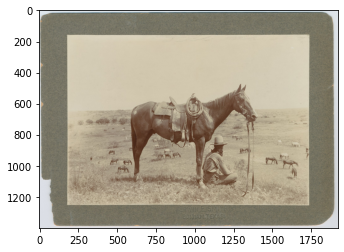

In [5]:
plt.imshow(image)

Sample text:

In [6]:
print(text)

O give me a home where the buffaloes roam
Where the deer and the antelope play
Where seldom is heard a discouraging word
And the skies are not cloudy all day
Home, home on the range
Where the deer and the antelope play
Where seldom is heard a discouraging word
And the skies are not cloudy all day
Where the air is so pure and the zephyrs so free
And the breezes so balmy and light
That I would not exchange my home on the range
For all of the cities so bright
Home, home on the range
Where the deer and the antelope play
Where seldom is heard a discouraging word
And the skies are not cloudy all day
How often at night when the heavens are bright
With the light of the glittering stars
I stand there amazed and I ask as I gaze
Does their glory exceed that of ours?
Home, home on the range
Where the deer and the antelope play
Where seldom is heard a discouraging word
And the skies are not cloudy all day


## Wrangling DataFrames

Wrangling a well-formed DataFrame just returns itself:

In [7]:
wrangled_df = dw.wrangle(dataframe)
assert np.allclose(dataframe, wrangled_df)
wrangled_df

,FirstDim,SecondDim,ThirdDim,FourthDim,FifthDim
ByTwos,,,,,
0,1,2,3,4,5
2,2,4,6,8,10
4,3,6,9,12,15
5,4,8,12,16,20
6,5,10,15,20,25
8,6,12,18,24,30
10,7,14,21,28,35


## Wrangling Arrays

Wrangling an Array turns it into a DataFrame.  If the Array is 2D, the resulting DataFrame will have the same
shape:

In [8]:
wrangled_array = dw.wrangle(array)
assert np.allclose(dataframe, wrangled_array)
wrangled_array

,0,1,2,3,4
0,1,2,3,4,5
1,2,4,6,8,10
2,3,6,9,12,15
3,4,8,12,16,20
4,5,10,15,20,25
5,6,12,18,24,30
6,7,14,21,28,35


Note that we've recovered the original DataFrame, but the index and column labels have been reset.  We can provide
these labels to the wrangle function.  The `array_kwargs` keyword argument specifies how array (or array-like) data
objects should be turned into DataFrames:

In [9]:
array_kwargs = {'index': dataframe.index, 'columns': dataframe.columns}
wrangled_array2 = dw.wrangle(array, array_kwargs=array_kwargs)
wrangled_array2

,FirstDim,SecondDim,ThirdDim,FourthDim,FifthDim
ByTwos,,,,,
0,1,2,3,4,5
2,2,4,6,8,10
4,3,6,9,12,15
5,4,8,12,16,20
6,5,10,15,20,25
8,6,12,18,24,30
10,7,14,21,28,35


## Wrangling text data using natural language processing models

Next, let's play with some text data.  By default, `data-wrangler` embeds text using a Latent Dirichlet Allocation model
trained on a curated version of Wikipedia, called the "minipedia" corpus.  First we'll split the text into its component
lines, and then we'll wrangle the result:

In [10]:
lines = text.split('\n')  # creates a list of strings (one string per line)
wrangled_text = dw.wrangle(lines)
wrangled_text

loading corpus: minipedia...done!


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
3,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
4,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
5,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
6,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
7,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
8,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
9,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


In the resulting DataFrame, each row corresponds to a line of text, and each column corresponds to an embedding
dimension.  To get a better feel for what these dimensions mean, we can use the `return_model` flag to get back the
fitted model, and then we can examine the top-weighted words from each topic:

In [11]:
wrangled_text2, text_model = dw.wrangle(lines, text_kwargs={'return_model': True})

In [12]:
# display top words from the model
def get_top_words(model, n_words=10):
  vectorizer = model[0]['model']
  embedder = model[1]['model']

  vocab = {v: k for k, v in vectorizer.vocabulary_.items()}
  top_words = []
  for k in range(embedder.components_.shape[0]):
      top_words.append([vocab[i] for i in np.argsort(embedder.components_[k, :])[::-1][:n_words]])
  return top_words

def display_top_words(model, n_words=10):
  for k, w in enumerate(get_top_words(model, n_words=n_words)):
      print(f'Topic {k}: {", ".join(w)}')

print(f'Top words from each of the {wrangled_text2.shape[1]} discovered topics:\n')
display_top_words(text_model)

Top words from each of the 50 discovered topics:

Topic 0: angle, points, normal, units, equal, measure, distribution, distance, unit, constant
Topic 1: foot, feet, double, speed, running, course, action, round, distance, motion
Topic 2: game, play, team, played, rules, sports, field, events, competition, women
Topic 3: mm, metal, plastic, glass, steel, diameter, sizes, machine, strength, cm
Topic 4: 2008, million, 2007, 2009, 2011, 2010, march, december, 2006, january
Topic 5: color, green, blue, yellow, colors, brown, tree, dark, plant, plants
Topic 6: music, sound, film, rock, played, television, play, record, records, classical
Topic 7: hours, night, hour, days, minutes, 24, week, daily, sun, working
Topic 8: theory, self, behavior, science, cultural, concept, studies, individuals, model, relationship
Topic 9: earth, sun, god, million, appears, visible, bodies, believed, billion, ago
Topic 10: computer, data, management, project, key, electronic, access, online, devices, technology

Then we can ask which topics had the most weight in each line:

In [13]:
i = 1
line_embedding = wrangled_text2.loc[i].values
line_top_topic = np.where(line_embedding == np.max(line_embedding))[0][0]

print(f'Line {i} put the most weight on topic {line_top_topic}: {lines[i]}')

Line 1 put the most weight on topic 2: Where the deer and the antelope play


Note that each time the model is re-trained, the topic weights will change.  If all text data are wrangled in a single
pass, `data-wrangler` will automatically apply the same model to all text data.  However, if the data are wrangled in
multiple calls to `dw.wrangle`, the model fit during the first pass should be re-used in subsequent analyses:

In [14]:
def match(a, b, type):
    if np.allclose(a, b):
        print(f'{type.capitalize()}s match!')
    else:
        print(f'{type.capitalize()}s do NOT match!')

match(wrangled_text, wrangled_text2, 'topic')

Topics do NOT match!


We can re-apply the already-fitted model to "new" text:

In [15]:
wrangled_text3 = dw.wrangle(lines, text_kwargs={'model': text_model})
match(wrangled_text2, wrangled_text3, 'topic')

Topics match!


In addition to training scikit-learn text embedding models and applying them to new text, `data-wrangler` also provides
wrappers for all models on [hugging-face](https://huggingface.co/transformers/pretrained_models.html).  For example,
the example text may be embedded using BERT as follows:

In [16]:
bert = {'model': 'TransformerDocumentEmbeddings', 'args': ['bert-base-uncased'], 'kwargs': {}}
bert_embeddings = dw.wrangle(lines, text_kwargs={'model': bert})
bert_embeddings

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.179094,0.284875,-0.299491,-0.177137,-0.141404,-0.067665,0.565553,0.467750,-0.202324,-0.212224,...,-0.084236,-0.418129,0.018537,0.011057,-0.008122,0.272119,-0.206632,-0.628336,0.101313,0.264802
1,-0.355487,-0.017091,-0.654681,-0.259151,0.354129,-0.081604,0.058410,0.774030,-0.508033,-0.182541,...,0.604850,-0.409842,-0.351007,0.006899,0.283090,0.510657,-0.163572,-0.187182,0.706947,0.126187
2,-0.434022,0.232728,-0.357610,-0.538824,-0.114096,0.091183,0.355937,0.533486,-0.258791,-0.517260,...,0.326534,-0.007036,0.122069,0.427969,0.178177,0.006136,0.400360,-0.195199,-0.078082,0.425256
3,0.116562,0.352505,-0.202589,-0.516457,-0.240493,-0.251500,0.434644,1.104639,-0.548261,-0.573233,...,-0.207017,-0.543512,0.078864,0.427558,0.229642,0.177264,0.150222,-0.463897,0.718633,0.301247
4,-0.303647,0.064255,0.083019,-0.227822,-0.155865,-0.340454,0.406733,0.363462,-0.119832,0.008430,...,0.045680,-0.289353,0.040407,0.220519,0.385223,-0.200164,-0.278663,-0.711024,0.326283,0.156556
5,-0.355487,-0.017091,-0.654681,-0.259151,0.354129,-0.081604,0.058410,0.774030,-0.508033,-0.182541,...,0.604850,-0.409842,-0.351007,0.006899,0.283090,0.510657,-0.163572,-0.187182,0.706947,0.126187
6,-0.434022,0.232728,-0.357610,-0.538824,-0.114096,0.091183,0.355937,0.533486,-0.258791,-0.517260,...,0.326534,-0.007036,0.122069,0.427969,0.178177,0.006136,0.400360,-0.195199,-0.078082,0.425256
7,0.116562,0.352505,-0.202589,-0.516457,-0.240493,-0.251500,0.434644,1.104639,-0.548261,-0.573233,...,-0.207017,-0.543512,0.078864,0.427558,0.229642,0.177264,0.150222,-0.463897,0.718633,0.301247
8,-0.154609,-0.117675,-0.193155,-0.120318,0.144618,-0.040556,0.055185,0.593648,-0.052717,-0.609513,...,0.127333,-0.753203,-0.320297,0.160509,0.180886,0.219988,-0.039618,-0.503588,0.528944,0.037808
9,-0.055069,0.233549,-0.373195,-0.063233,-0.368840,-0.094472,-0.001174,0.553668,-0.308054,-0.308339,...,-0.078380,-0.351585,0.063690,0.097025,0.297684,0.268404,-0.114566,-0.443027,0.438811,0.249571


## Wrangling images

Images (stored in any format supported by [matplotlib](https://matplotlib.org/)) treated as Arrays.  Images are wrangled
into `DataFrame`s by slicing the image along axis 2 (i.e., the color dimension), horizontally concatenating the slices,
and then turning the result into a `DataFrame`.  In general, this approach is taken for all high-dimensional (> 2D)
Arrays:

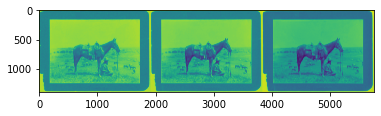

In [17]:
wrangled_image = dw.wrangle(image)
plt.imshow(wrangled_image);

## Objects, file paths, and URLs

Data supplied to `data-wrangler` may be passed in directly as a Python object that is already loaded into memory (as in
the above examples).  However, data may also be supplied as a (string) file path or URL.  For example,
wrangling the already loaded-in image versus wrangling the image's file path will yield the same result:

In [18]:
wrangled_image_from_path = dw.wrangle(image_file)
match(wrangled_image, wrangled_image_from_path, 'image')


Images match!


# Handling multiple data types

Multiple objects, file paths, or URLs may be wrangled in a single function call.  If desired, type-specific wrangling
preferences may be provided.  Specifying `return_dtype=True` also returns a list of the automatically detected data
types for each object:

In [19]:
text_kwargs = {'model': bert}

i = 10
first_lines = lines[:i]
last_lines = lines[i:]

In [20]:
wrangled_data, dtypes = dw.wrangle([dataframe, array, image_file, first_lines, last_lines],
                                   text_kwargs=text_kwargs,
                                   return_dtype=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 

We can check the inferred datatypes:

In [21]:
dtypes

['dataframe', 'array', 'array', 'text', 'text']

We can also verify that when the data are wrangled simultaneously, we get the same results as when each object is
wrangled separately.  For example, here's the newly wrangled image:

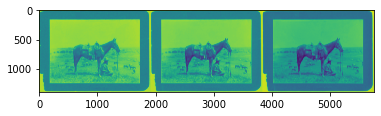

In [22]:
# visualize the wrangled image
plt.imshow(wrangled_data[2])

And here's how the text embeddings compare to our previous results:

In [23]:
# compare the first lines' embeddings:
match(bert_embeddings.iloc[:i], wrangled_data[3], 'first lines\'s BERT embedding')

# compare the last lines' embeddings
match(bert_embeddings.iloc[i:], wrangled_data[4], 'last lines\'s BERT embedding')

First lines's bert embeddings match!
Last lines's bert embeddings match!


Check out the other tutorials for more advanced data wrangling functions!